In [74]:
# Setup the library
import pyrogue as pr
import os, sys
import matplotlib.pyplot as plt
import time
import numpy as np
import math
from scipy.optimize import curve_fit


top_level=f'{os.getcwd()}/../../../'
pr.addLibraryPath( f'{top_level}/scripts' )
import setupLibPaths
import epix_hr_single_10k
import ePixViewer.Cameras as cameras

%run ../../ASIC_V4/supportFunctions.ipynb

In [4]:
# Create and start the root class
root = epix_hr_single_10k.RootLCLSIITiming(
    top_level   = top_level,
    sim         = False,
    dev         = '/dev/datadev_0',
    asicVersion = 4
)
root.start()

Simulation mode : False
Start: Started zmqServer on ports 9099-9101
    To start a gui: python -m pyrogue gui --server='localhost:9099'
    To use a virtual client: client = pyrogue.interfaces.VirtualClient(addr='localhost', port=9099)


In [5]:
# Create useful pointers
AxiVersion = root.Core.AxiVersion
print ( '###################################################')
print ( '#             Firmware Version                    #')
print ( '###################################################')
AxiVersion.printStatus()
print ( '###################################################')

###################################################
#             Firmware Version                    #
###################################################
Path         = ePixHr10kT.Core.AxiVersion
FwVersion    = 0x3010000
UpTime       = 3:37:05
GitHash      = 0x563a68027652195474e6a610098a11775111615a
XilinxDnaId  = 0x40020001013a928124b102c5
FwTarget     = EpixHr10kTLclsIITiming
BuildEnv     = Vivado v2022.2
BuildServer  = rdsrv408 (Ubuntu 20.04.6 LTS)
BuildDate    = Thu 02 Nov 2023 02:16:58 PM PDT
Builder      = ddoering
###################################################


# Baseline TEST all - 320MHz refGenB,RefGenC modified

In [6]:
MAX_NUMBER_OF_FRAMES_PER_BATCH  = 1000
cameraType            = 'ePixHr10kTBatcher'
bitMask               = 0xffff
currentCam = cameras.Camera(cameraType = cameraType)
currentCam.bitMask = bitMask

Camera  ePixHr10kTBatcher  selected.


In [7]:
#Initialze the camera
#[routine, asic0, asic1, asic2, asic3]'
initSequence = 5
root.EpixHR.InitASIC([initSequence,0,0,1,0])
#points to the ASIC device under test
ASIC = root.EpixHR.Hr10kTAsic2
root.EpixHR.BatcherEventBuilder0.Blowoff.set(True)
root.EpixHR.BatcherEventBuilder0.Bypass.set(1)
root.EpixHR.BatcherEventBuilder1.Blowoff.set(False)
root.EpixHR.BatcherEventBuilder1.Bypass.set(1)
root.EpixHR.BatcherEventBuilder2.Blowoff.set(True)

Rysync ASIC started
Init ASIC script started
Loading MMCM configuration
/u3/ePix10k/epix-hr-single-10k/software/notebooks/Lorenzo/Test/../../..//yml/ePixHr10kT_MMCM_320MHz.yml
Completed
Loading supply configuration
/u3/ePix10k/epix-hr-single-10k/software/notebooks/Lorenzo/Test/../../..//yml/ePixHr10kT_PowerSupply_Enable.yml
Loading register control (waveforms) configuration
/u3/ePix10k/epix-hr-single-10k/software/notebooks/Lorenzo/Test/../../..//yml/ePixHr10kT_RegisterControl_R0Width12us_AcqWidth24us_320MHz.yml
Loading packet registers
Disabling packet lanes for ASIC 0
Disabling packet lanes for ASIC 1
Disabling packet lanes for ASIC 3
/u3/ePix10k/epix-hr-single-10k/software/notebooks/Lorenzo/Test/../../..//yml/ePixHr10kT_PacketRegisters.yml
Taking asic off of reset
Loading ASIC and timing configuration
Loading  /u3/ePix10k/epix-hr-single-10k/software/notebooks/Lorenzo/Test/../../..//yml/ePixHr10kT_PLLBypass_248MHz_ASIC_2.yml
Command executed :  <class 'pyrogue._Command.BaseCommand'> -

In [8]:
#Makes sure triggers are off
root.EpixHR.TriggerRegisters.RunTriggerEnable.set(False)
time.sleep(0.1)
root.EpixHR.TriggerRegisters.RunTriggerEnable.set(True)
time.sleep(10)
root.EpixHR.TriggerRegisters.RunTriggerEnable.set(False)
time.sleep(0.1)


In [9]:
#use system with batcher and missing ASICs
root.EpixHR.SspLowSpeedDecoderReg.enable.set(True)
print ("Locked lanes: %x" % root.EpixHR.SspLowSpeedDecoderReg.Locked.get())
#Only ASIC 1 is available so disable the 6 lower lanes
root.EpixHR.PacketRegisters0.DisableLane.set(0x3FF)
root.EpixHR.PacketRegisters1.DisableLane.set(0xFC0)



Locked lanes: 3f000


In [10]:
print(ASIC.Preamp.get())
print(ASIC.Vld1_b.get())
print(ASIC.Pixel_CB.get())
print(ASIC.Filter_DAC.get())
print(ASIC.VRef_DAC.get())

4
1
4
38
53


In [11]:
print('DHG', ASIC.DHg.get())
print('RefGenB', ASIC.RefGenB.get())
print('RefGenC', ASIC.RefGenC.get())
print('S2D_1_b', ASIC.S2D_1_b.get())
print('shvc_DAC', ASIC.shvc_DAC.get())
print('S2dDacBias', ASIC.S2dDacBias.get())
DHg = True
RefGenB = 2
RefGenC = 3
S2D_1_b = 0
shvc_DAC = 23
S2dDacBias = 3
print("")
ASIC.DHg.set(DHg)  
ASIC.RefGenB.set(RefGenB)
ASIC.RefGenC.set(RefGenC)
ASIC.S2D_1_b.set(S2D_1_b)
ASIC.shvc_DAC.set(shvc_DAC)
ASIC.S2dDacBias.set(S2dDacBias)
print('DHG', ASIC.DHg.get())
print('RefGenB', ASIC.RefGenB.get())
print('RefGenC', ASIC.RefGenC.get())
print('S2D_1_b', ASIC.S2D_1_b.get())
print('shvc_DAC', ASIC.shvc_DAC.get())
print('S2dDacBias', ASIC.S2dDacBias.get())

DHG True
RefGenB 3
RefGenC 2
S2D_1_b 0
shvc_DAC 23
S2dDacBias 3

DHG True
RefGenB 2
RefGenC 3
S2D_1_b 0
shvc_DAC 23
S2dDacBias 3


In [13]:
#Makes sure triggers are off
root.EpixHR.TriggerRegisters.RunTriggerEnable.set(False)
time.sleep(0.2)
root.EpixHR.TriggerRegisters.RunTriggerEnable.set(True)
time.sleep(0.2)
root.EpixHR.TriggerRegisters.RunTriggerEnable.set(False)
time.sleep(0.2)

# Set references 
Preamp = 4 #4
Vld1_b = 1 #1
Pixel_CB= 4 #4
Filter_DAC= 38 #33
VRef_DAC = 53 #22

setPixel (Preamp, Vld1_b, Pixel_CB, Filter_DAC, VRef_DAC)

pedsList = [12,12,8,0,0]
trbitList = [True,0,0,True,0]

#########
index = 0
trbit = trbitList[index]
ASIC.trbit.set(trbit)
peds = pedsList[index]
ASIC.ClearMatrix(peds)
######################################################################################################################
# Remove previous dataset
filename = (f'/u1/lorenzor/10kthr_data/temp.dat')

#########
index = 1
trbit = trbitList[index]
ASIC.trbit.set(trbit)
peds = pedsList[index]
ASIC.ClearMatrix(peds)

print('Cfg done')


# FH = complete_test(filename)
imgDesc = run_asic_test(numFrames = 2000, initialDelay = 0)

print('Done')
print(np.shape(imgDesc))




Preamp 4
Vld1_b 1
Pixel_CB 4
Filter_DAC 38
VRef_DAC 53
Command executed :  <class 'pyrogue._Command.BaseCommand'> - ePixHr10kT.EpixHR.Hr10kTAsic2.ClearMatrix
Command executed :  <class 'pyrogue._Command.BaseCommand'> - ePixHr10kT.EpixHR.Hr10kTAsic2.ClearMatrix
Cfg done
/u1/lorenzor/10kthr_data/temp.dat
Aquisition Counter 14410
DAQ Counter 14410
Number of frames received: 0
Delta Aquisition Counter: 2002
Number of frames received: 2002
Starting to get data set 0
Read 1000 frames
numberOfFrames in the 3D array:  1000
Starting descrambling images
(1000, 56072)
Done
(2000, 145, 384)


(array([  2.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   2.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   2.,   2.,
          0.,   0.,   2.,   2.,   8.,  18.,  70.,  88., 208., 288., 366.,
        456., 178., 174.,  76.,  48.,   6.,   4.]),
 array([5771. , 5773.8, 5776.6, 5779.4, 5782.2, 5785. , 5787.8, 5790.6,
        5793.4, 5796.2, 5799. , 5801.8, 5804.6, 5807.4, 5810.2, 5813. ,
        5815.8, 5818.6, 5821.4, 5824.2, 5827. , 5829.8, 5832.6, 5835.4,
        5838.2, 5841. , 5843.8, 5846.6, 5849.4, 5852.2, 5855. , 5857.8,
        5860.6, 5863.4, 5866.2, 5869. , 5871.8, 5874.6, 5877.4, 5880.2,
        5883. ]),
 <BarContainer object of 40 artists>)

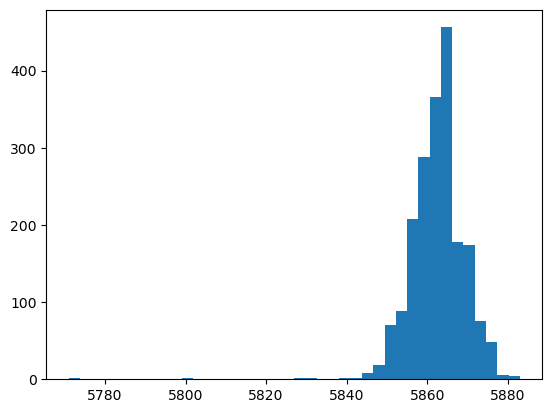

In [14]:
plt.hist(imgDesc[:,1,1], bins=40)

In [134]:
ASIC.mTest.set(True)

# Defaults
ASIC.RefGenB.set(3) #2 bits
ASIC.RefGenC.set(2) #2 bits
ASIC.S2D_1_b.set(0) #3 bits
ASIC.shvc_DAC.set(23) #6 bits
ASIC.S2dDacBias.set(3)
ASIC.DHg.set(True)

# Test
# ASIC.RefGenB.set(1) #2 bits
# ASIC.RefGenC.set(2) #2 bits
# ASIC.S2D_1_b.set(0) #3 bits
# ASIC.shvc_DAC.set(23) #6 bits
# ASIC.S2dDacBias.set(3)
# ASIC.DHg.set(False)

#sets HSDAC device
root.EpixHR.HSDac.enable.set(True)
#reset status
root.EpixHR.HSDac.WFEnabled.set(False)
root.EpixHR.HSDac.waveformSource.set(0)
root.EpixHR.HSDac.externalUpdateEn.set(False)
root.EpixHR.HSDac.run.set(False)

#configure
root.EpixHR.HSDac.rCStartValue.set(0)
root.EpixHR.HSDac.rCStopValue.set(65535)
root.EpixHR.HSDac.rCStep.set(66) # < --- Do not change!
root.EpixHR.HSDac.WFEnabled.set(True)
root.EpixHR.HSDac.waveformSource.set(1)
root.EpixHR.HSDac.externalUpdateEn.set(True)
root.EpixHR.HSDac.run.set(True)

dacValuesV = np.linspace(0.0,65535.0,1024)[0:980] / 65535 * 2.31 

In [135]:
# Take data
imgDesc = run_asic_test(numFrames = 2048, initialDelay = 0)

# Only take first 1000 frames because for some reason the DAC restarts there?
# But I cannot take 1000, I need to take 2000 
imgDesc = imgDesc[0:980,:,:]

/u1/lorenzor/10kthr_data/temp.dat
Aquisition Counter 86460
DAQ Counter 86460
Number of frames received: 0
Number of frames received: 2001
Delta Aquisition Counter: 4004
Number of frames received: 4004
Starting to get data set 0
Read 1000 frames
numberOfFrames in the 3D array:  1000
Starting descrambling images
(1000, 56072)


Odd  min/max = [830,14799]
Even min/max = [809,14723]


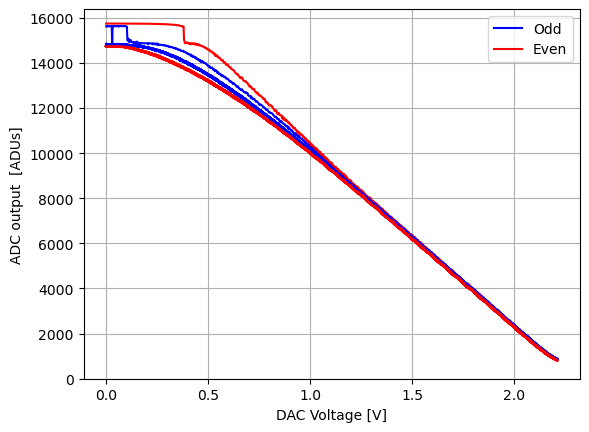

In [136]:
# Plot all, in odd/even fashion
col = 116

plt.plot(dacValuesV,imgDesc[0:,0,col],label='Odd', c='blue')
plt.plot(dacValuesV,imgDesc[0:,1,col],label='Even', c='red')

for col in range(0,1,1):
    for row in range(2,144,2):
        plt.plot(dacValuesV,imgDesc[0:1000,row,col], c='blue')
        plt.plot(dacValuesV,imgDesc[0:1000,row+1,col], c='red')

print('Odd  min/max = [{},{}]'.format(min(imgDesc[0:1000,0,col]),max(imgDesc[0:1000,0,col])))
print('Even min/max = [{},{}]'.format(min(imgDesc[0:1000,1,col]),max(imgDesc[0:1000,1,col])))

   
plt.ylim(0,2**14)

plt.xlabel('DAC Voltage [V]')
plt.ylabel('ADC output  [ADUs]')

plt.legend()
plt.grid()



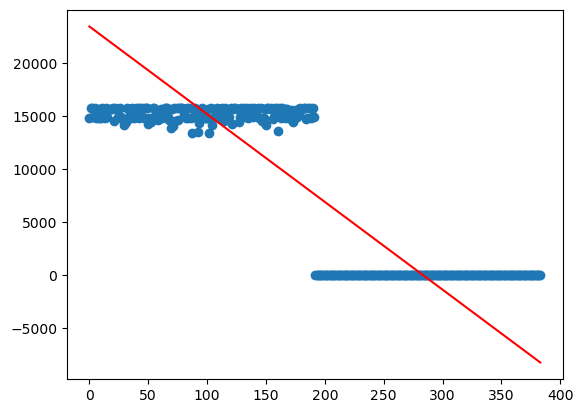

In [137]:
# Define the linear function
def linear_function(x, a, b):
    return a * x + b

y = imgDesc[0,0]
x = range(0, len(y), 1)

weights = np.exp(-(x - np.mean(x))**2 / (2 * np.std(x)**2))
params, covariance = curve_fit(linear_function, x, y, sigma=1/weights, absolute_sigma=True)

y_fit = linear_function(x, *params)

plt.scatter(x, y, label='Data')
plt.plot(x, y_fit, label='Linear Fit', color='red')
